# task1  (lesson7)
* sqlite3: Сделать тестовый проект с БД (sqlite3, project name: task1_7). В таблицу table1 записать 1000 строк с случайными значениями (3 колонки, тип int) от 0 до 1000.
* Далее построить гистаграмму распределения этих трех колонко

In [84]:
import pandas as pd


In [85]:
import sqlite3

print(sqlite3.version)
print(sqlite3.sqlite_version)

2.6.0
3.22.0


In [86]:
con = sqlite3.connect('task1_7')
con

In [87]:
cur = con.cursor()
cur

In [88]:
cur.execute("DROP TABLE IF EXISTS table1")

cur.execute("""
            CREATE TABLE table1
            (
                column_01 int,
                column_02 int,
                column_03 int
            )
""")

con.commit()

In [89]:
for row in cur.execute("SELECT * FROM table1"):
    print(row)

In [90]:
cur.execute("SELECT * FROM table1").fetchall()

[]

In [91]:
import random

def func_generate_random(limit):
    return random.randrange(limit)
    
con.create_function("generate_random", 1, func_generate_random)

cur.execute("""
   WITH RECURSIVE generate_row(value) AS (
     VALUES(1)
     UNION ALL
     SELECT value + 1 FROM generate_row WHERE value < 1000
   )
   INSERT INTO table1(column_01, column_02, column_03)
   SELECT
        generate_random(1000), 
        generate_random(1000), 
        generate_random(1000)
    FROM generate_row
   ;
""")

cur.execute("SELECT * FROM table1").fetchall()

[(208, 991, 527),
 (655, 111, 774),
 (739, 762, 345),
 (223, 799, 469),
 (978, 717, 278),
 (785, 531, 69),
 (958, 392, 378),
 (419, 978, 732),
 (267, 174, 704),
 (301, 167, 522),
 (902, 127, 893),
 (820, 531, 725),
 (413, 827, 878),
 (877, 825, 513),
 (594, 98, 1),
 (867, 396, 154),
 (902, 9, 893),
 (672, 238, 798),
 (490, 225, 338),
 (664, 313, 4),
 (579, 156, 982),
 (385, 919, 740),
 (786, 801, 160),
 (622, 675, 847),
 (894, 173, 965),
 (951, 138, 295),
 (489, 671, 224),
 (384, 850, 660),
 (903, 468, 364),
 (614, 650, 276),
 (551, 622, 253),
 (947, 457, 179),
 (786, 963, 803),
 (152, 946, 268),
 (802, 300, 320),
 (971, 195, 386),
 (514, 50, 544),
 (852, 79, 570),
 (634, 238, 66),
 (341, 540, 217),
 (855, 905, 422),
 (281, 634, 784),
 (607, 693, 842),
 (522, 622, 13),
 (886, 671, 554),
 (45, 215, 176),
 (414, 352, 13),
 (540, 776, 188),
 (414, 346, 828),
 (383, 25, 508),
 (203, 472, 449),
 (220, 789, 920),
 (596, 224, 517),
 (312, 971, 145),
 (795, 357, 139),
 (900, 733, 190),
 (710, 

In [92]:
df = pd.DataFrame(cur.execute("SELECT * FROM table1").fetchall())
df

,0,1,2
0,208,991,527
1,655,111,774
2,739,762,345
3,223,799,469
4,978,717,278
...,...,...,...
995,492,956,841
996,123,564,963
997,74,16,605
998,122,735,307


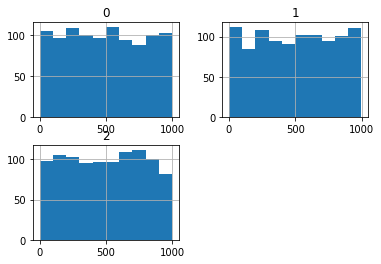

In [93]:
df.hist();

In [94]:
con.close()

# task2  (lesson7)
* oracle: https://leetcode.com/problems/duplicate-emails/







In [ ]:
select distinct email from person group by email having count(email) >= 2

# task3  (lesson7)
* oracle: https://leetcode.com/problems/employees-earning-more-than-their-managers/

In [ ]:
select Employee.name AS Employee 
from Employee 
left join Employee AS managers
on Employee.managerId = managers.id
where Employee.salary > managers.salary

# task4  (lesson7)
* oracle: https://leetcode.com/problems/rank-scores/

In [ ]:
WITH unique_scores AS
(
    select DISTINCT score FROM Scores
),
unique_ranks AS
(
    select score, RANK() OVER(ORDER BY score DESC) AS "rank"
    from unique_scores
    order by score DESC
)
select Scores.score, unique_ranks.rank from Scores
left join unique_ranks
on Scores.score = unique_ranks.score
order by Scores.score DESC

# task5  (lesson7)
* oracle: https://leetcode.com/problems/combine-two-tables/

In [ ]:
select firstName, lastName, city, state FROM Person
left join Address
on Person.personId = Address.personId 